# 송인욱
## 한국의 고령화 현황과 노인 일자리에 대한 인식 분석

In [4]:
import pymysql
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.font_manager as fm
import pandas as pd
import platform
from collections import Counter

In [5]:
# system_name = platform.system()

# if system_name == "Windows":
#     plt.rc("font", family="Malgun Gothic")
# elif system_name == "Darwin":
#     plt.rc("font", family="AppleGothic")
# else:
#     path = '/usr/share/fonts/truetype/name/NanumGothic.ttf'
#     font_name = fm.FontProperties(fname=path, size=12)
#     plt.rc(font_name)

In [6]:
conn = pymysql.connect(host='mysql', user='root', password='1111',
    db='Siu_db', charset='utf8')
cur = conn.cursor()

In [7]:
cur.execute(" select findtime, value from elderly_population ep where location = 'KOR'")
kor_elder = cur.fetchall()
kor_elder = pd.DataFrame(kor_elder)

cur.execute(" select findtime, value from elderly_population ep where location = 'CHN'")
chn_elder = cur.fetchall()
chn_elder = pd.DataFrame(chn_elder)

cur.execute(" select findtime, value from elderly_population ep where location = 'DEU'")
deu_elder = cur.fetchall()
deu_elder = pd.DataFrame(deu_elder)

cur.execute(" select findtime, value from elderly_population ep where location = 'USA'")
usa_elder = cur.fetchall()
usa_elder = pd.DataFrame(usa_elder)

cur.execute(" select findtime, value from elderly_population ep where location = 'SWE'")
swe_elder = cur.fetchall()
swe_elder = pd.DataFrame(swe_elder)

****
### **한국의 고령화 현황 분석**

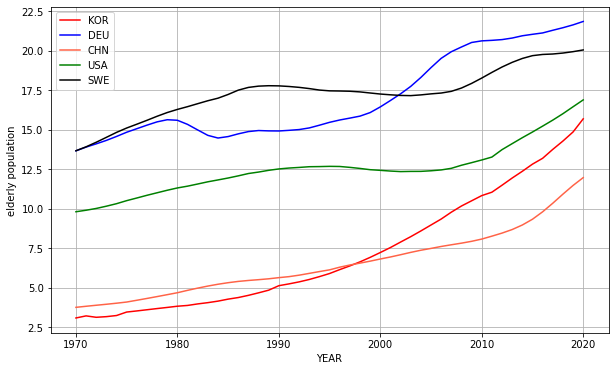

In [8]:
plt.figure(figsize=(10,6))
plt.plot(kor_elder[0], kor_elder[1], label='KOR', color='red')
plt.plot(deu_elder[0], deu_elder[1], label='DEU', color='blue')
plt.plot(chn_elder[0], chn_elder[1], label='CHN', color='tomato')
plt.plot(usa_elder[0], usa_elder[1], label='USA', color='green')
plt.plot(swe_elder[0], swe_elder[1], label='SWE', color='black')

plt.xlabel('YEAR')
plt.ylabel('elderly population')
plt.grid()
plt.legend()
plt.show()

#### **OECD 국가와 한국의 노령 인구 비교**
- 한국은 1990년 까지는 노령인구가 적었으나 2000부터 가파르게 상승하고 있음

In [9]:
cur.execute(" select findtime, value from old_age_dependency_ratio ep where location = 'KOR'")
kor_ratio = cur.fetchall()
kor_ratio = pd.DataFrame(kor_ratio)

cur.execute(" select findtime, value from old_age_dependency_ratio ep where location = 'CHN'")
chn_ratio = cur.fetchall()
chn_ratio = pd.DataFrame(chn_ratio)

cur.execute(" select findtime, value from old_age_dependency_ratio ep where location = 'DEU'")
deu_ratio = cur.fetchall()
deu_ratio = pd.DataFrame(deu_ratio)

cur.execute(" select findtime, value from old_age_dependency_ratio ep where location = 'USA'")
usa_ratio = cur.fetchall()
usa_ratio = pd.DataFrame(usa_ratio)

cur.execute(" select findtime, value from old_age_dependency_ratio ep where location = 'SWE'")
swe_ratio = cur.fetchall()
swe_ratio = pd.DataFrame(swe_ratio)

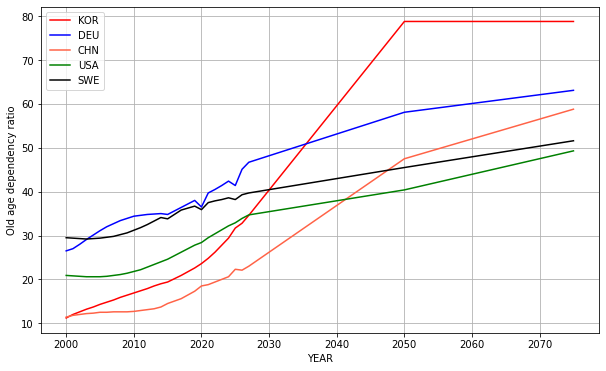

In [10]:
plt.figure(figsize=(10,6))
plt.plot(kor_ratio[0], kor_ratio[1], label='KOR', color='red')
plt.plot(deu_ratio[0], deu_ratio[1], label='DEU', color='blue')
plt.plot(chn_ratio[0], chn_ratio[1], label='CHN', color='tomato')
plt.plot(usa_ratio[0], usa_ratio[1], label='USA', color='green')
plt.plot(swe_ratio[0], swe_ratio[1], label='SWE', color='black')

plt.xlabel('YEAR')
plt.ylabel('Old age dependency ratio')
plt.grid()
plt.legend()
plt.show()

#### **OECD 국가와 한국의 노년부양비 비교**
지금은 노년부양비가 그리 높지 않지만 이대로 가면 2030년부터 가파르게 상승해 전세계에서 가장 높은수준으로 올라감

In [11]:
def make_wordcloud_data(tag):
    cur.execute(
        "select cw.keyword, sum(countn) as count from (select * from craw_data where subtag = '" + tag + "') as cw group by keyword order by count desc"
        )
    dist = cur.fetchall()
    result = []

    for i in dist:
        i = list(i)
        i[1] = int(i[1])
        result.append(tuple(i))
        
    result = dict(result)
    result.pop(tag)
        
    return result

In [12]:
def show_worldcloud(data):
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumGothic.ttf'

    wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(data)

    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [13]:
dist = make_wordcloud_data('혐오')
worker = make_wordcloud_data('종업원')
work = make_wordcloud_data('일자리')

### **한국의 노인과 노인 일자리에 대한 인식 분석**

#### 혐오의 시대에 노인 혐오라는 새로운 용어의 등장
**틀, 문제, 세대**

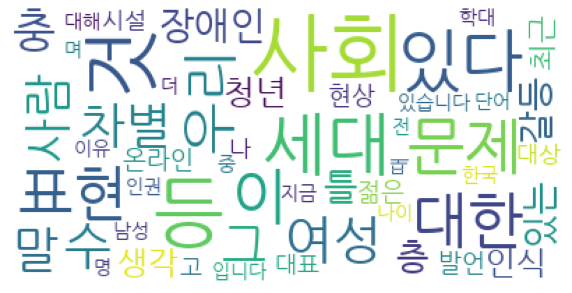

In [14]:
show_worldcloud(dist)

#### 노인 종업원 키워드로 워드 클라우드 결과
**말, 혐의, 경찰, 위반, 규정, 장애인**

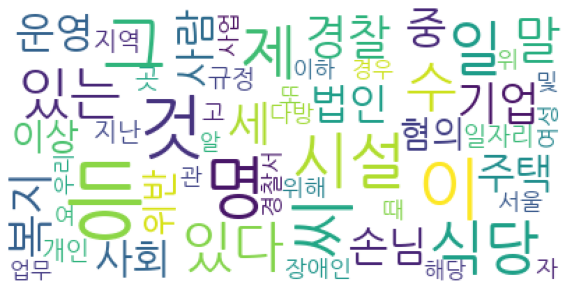

In [15]:
show_worldcloud(worker)

#### 노인 일자리 키워드로 워드 클라우드 결과
**활동, 교육, 어르신** 

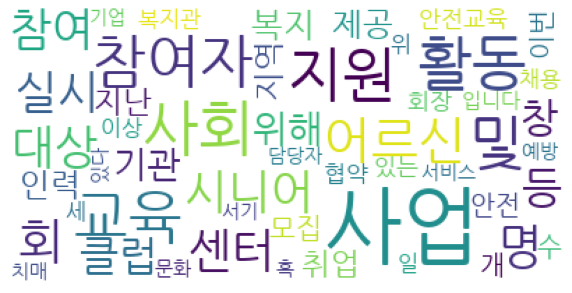

In [16]:
show_worldcloud(work)

In [17]:
cur.close()
conn.close()